In [ ]:
#Open_CP
!pip install https://github.com/QuantCrimAtLeeds/PredictCode/zipball/master
#SEPP
!pip install https://github.com/MatthewDaws/SEPP/zipball/master

# Función de entrenamiento y predicción de riñas

COMBIOS RESEARCH GROUP


In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import datetime
import numpy as np
import pyproj
import dateutil.parser
import descartes
import math
import csv

import matplotlib.pyplot as plt
import matplotlib.collections

# Librerias creadas por QuantCrimAtLeeds grupo de investigacion crimen de la universidad de Leeds U.K.
# https://github.com/QuantCrimAtLeeds/PredictCode
import open_cp
import open_cp.plot
import open_cp.geometry
import open_cp.predictors
import open_cp.sources.sepp

import open_cp.seppexp as seppexp
from open_cp import evaluation
import open_cp.sepp as sepp

In [2]:
df = pd.read_csv('verify_enrich_nuse_29112019.csv')

# Funcion de selección datos test:

In [5]:
import open_cp.sepp as sepp
import pickle
import pandas as pd

def selectData(nameLoc,dateIni,dateEnd):
    dfloc = df[df["LOCALIDAD"]==nameLoc]
    dfloc["FECHA_HORA"]=dfloc["HORA"].astype(str)
    valHour = dfloc["FECHA_HORA"].values
    valDate = dfloc["FECHA"].values
    timesVals = [];
    k = 0;
    for i in valHour:
        if len(i)<=2:
            timeStr = valDate[k] +" " + "00:"+i+":00"
        else:
            timeStr = valDate[k] +" " + i[:-2]+":"+i[-2:]+":00"
        
        k = k + 1

        timesVals.append(timeStr)
    dfloc["FECHA_HORA"] = timesVals;
    
    dfloc["FECHA_HORA_TS"] = dfloc.FECHA_HORA.map(dateutil.parser.parse)
    dfFilter = dfloc[(dfloc.FECHA_HORA_TS > dateIni) & (dfloc.FECHA_HORA_TS < dateEnd)]
    timestamps = dfFilter.FECHA_HORA_TS
    
    print("TimeStamps")
    print(type(timestamps))

    xcoords, ycoords = (dfFilter.LONGITUD.values,dfFilter.LATITUD.values)
    proj = pyproj.Proj(init="EPSG:3116")
    xcoords, ycoords = proj(xcoords,ycoords)
    
    points_crime = open_cp.TimedPoints.from_coords(timestamps, xcoords, ycoords)
    
    #Generando Grilla para los algoritmos. 
    maxx = max(xcoords)
    minx = min(xcoords)
    maxy = max(ycoords)
    miny = min(ycoords)

    region = open_cp.RectangularRegion(xmin=minx, xmax=maxx, ymin=miny, ymax=maxy)
    
    return (points_crime,region)



In [9]:
#Cargando el pkl del modelo entrenado
import pickle
delito = 'Rina'
comuna = 5
pkl='pkl/Train'+str(delito)+str(comuna)+'.pkl'
infile = open(pkl,'rb')
modelCrime = pickle.load(infile)
infile.close()

In [26]:
points_crime,region = selectData("CHAPINERO",'2017-01-16','2017-01-17')

C:\Users\fagomezj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\fagomezj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fagomezj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

TimeStamps
<class 'pandas.core.series.Series'>


2017-01-16 00:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 01:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 02:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 03:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 04:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 05:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 06:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 07:00:00
{0.01: 0.0, 0.1: 0.0}
None
2017-01-16 08:00:00
{0.01: 0.0, 0.1: 0.15384615384615385}
None
2017-01-16 09:00:00
{0.01: 0.0, 0.1: 0.15384615384615385}
None
2017-01-16 10:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 11:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 12:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 13:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 14:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 15:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 16:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 17:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}

C:\Users\fagomezj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


2017-01-16 20:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 21:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 22:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None
2017-01-16 23:00:00
{0.01: 0.0, 0.1: 0.07692307692307693}
None


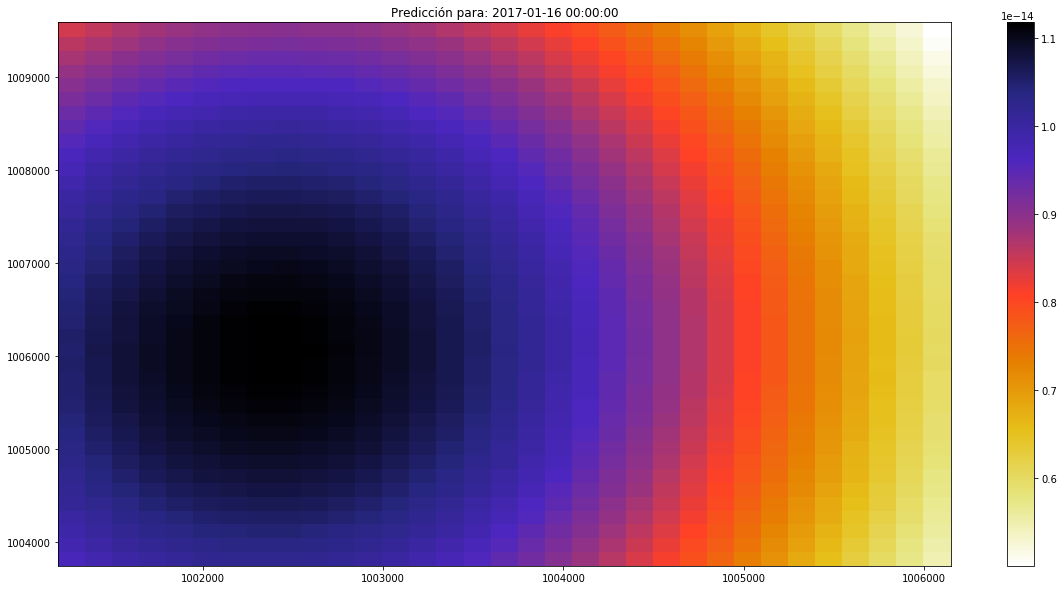

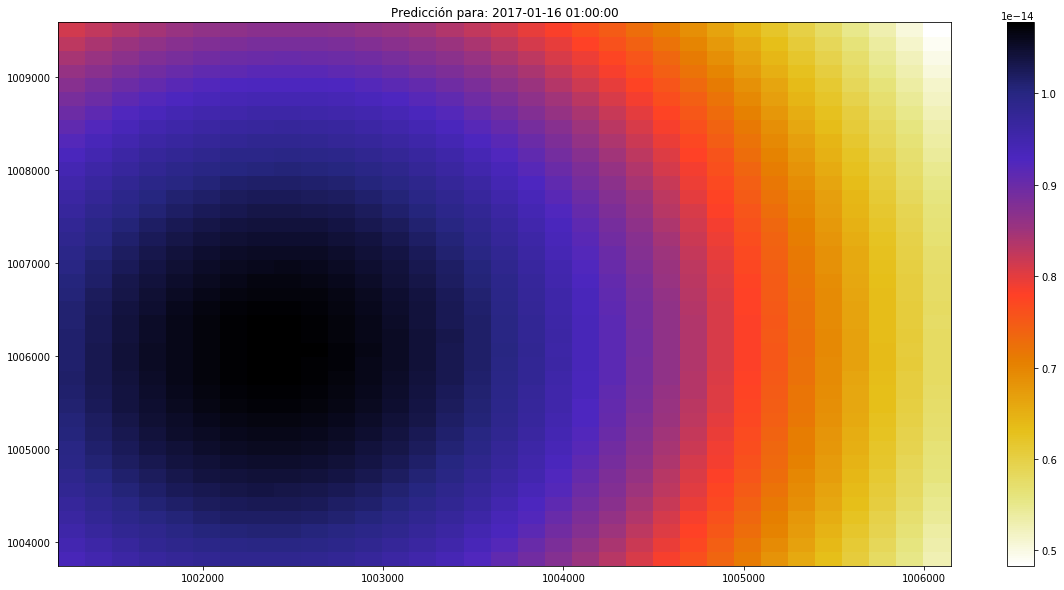

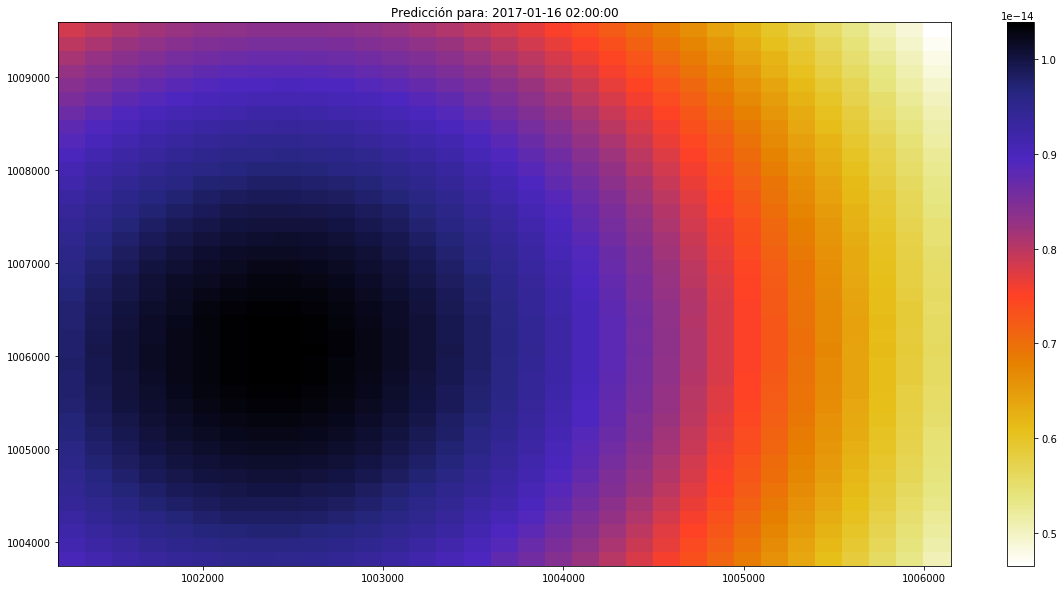

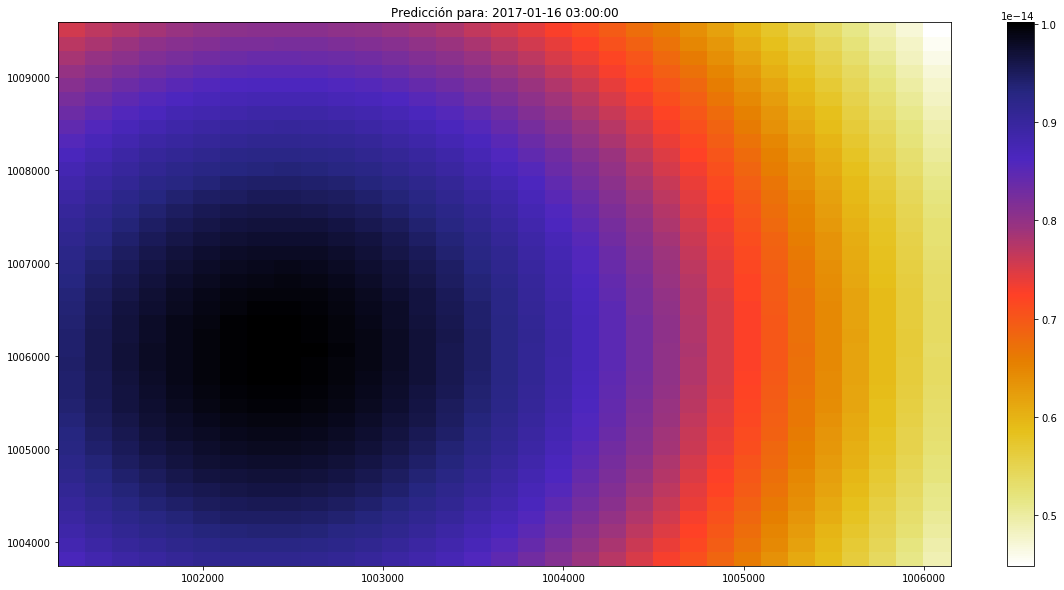

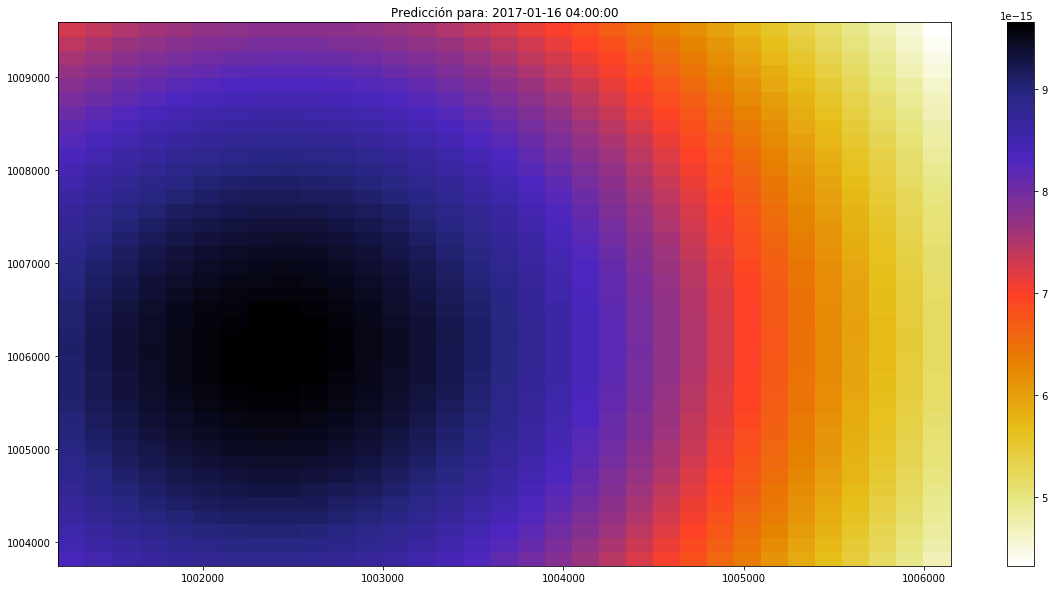

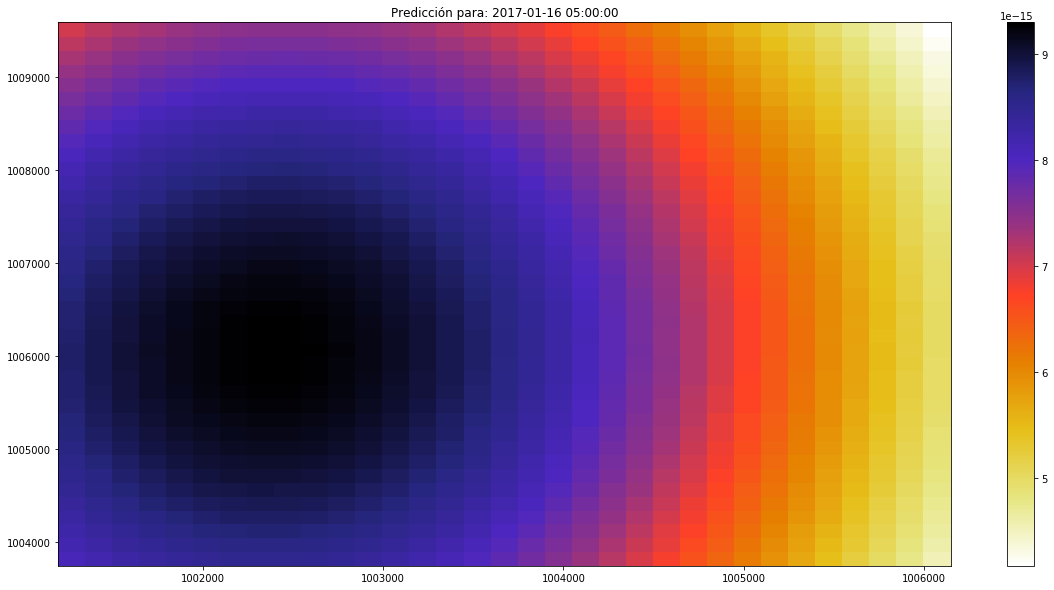

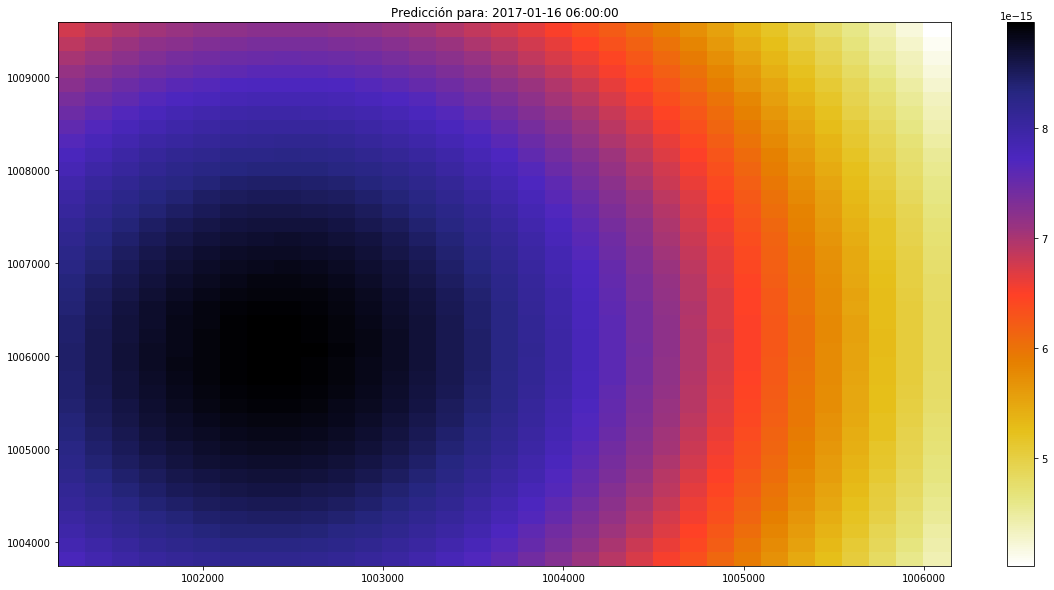

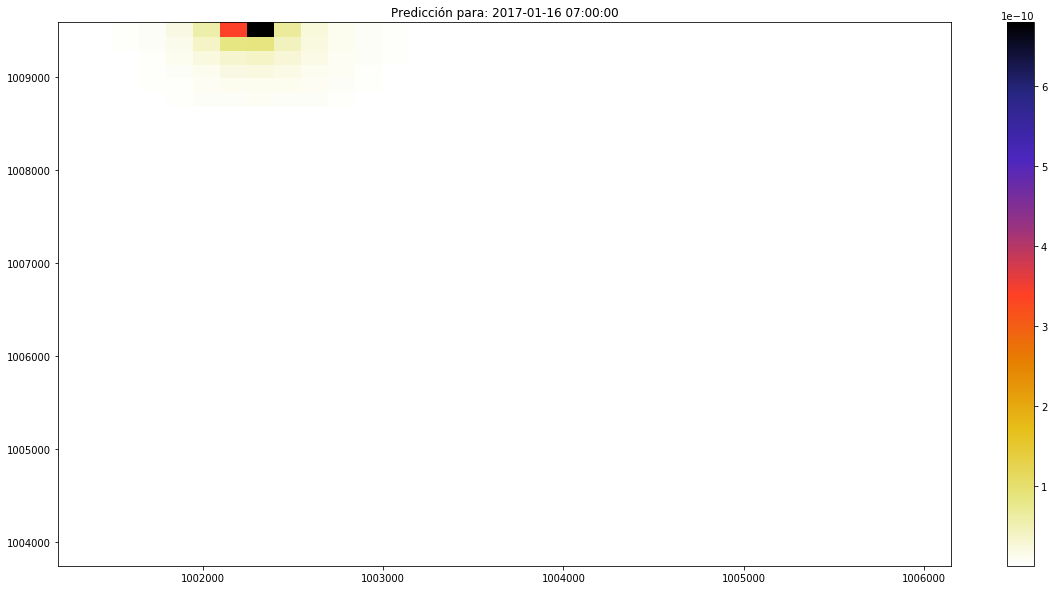

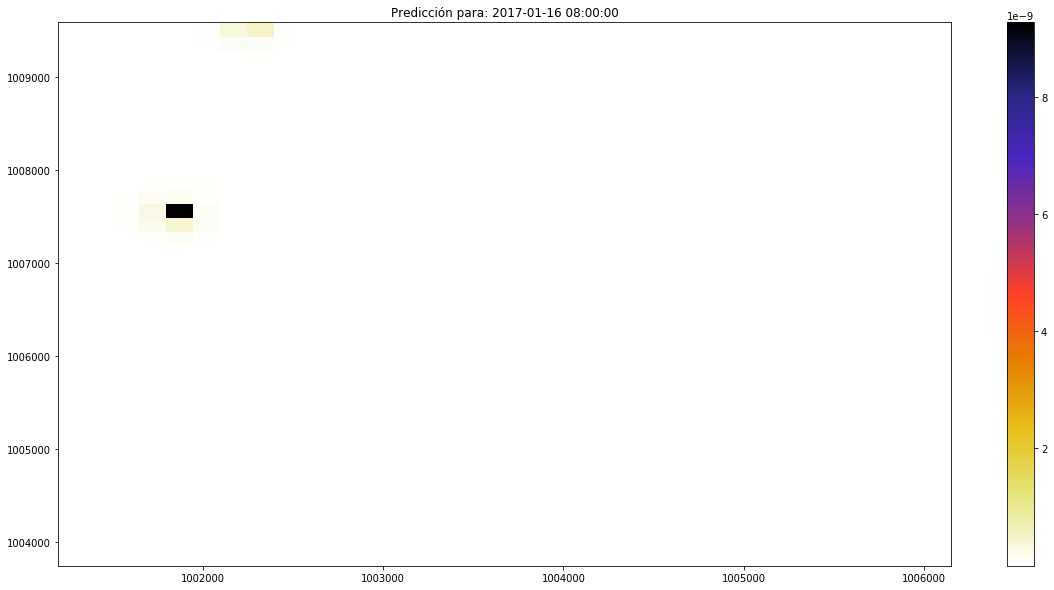

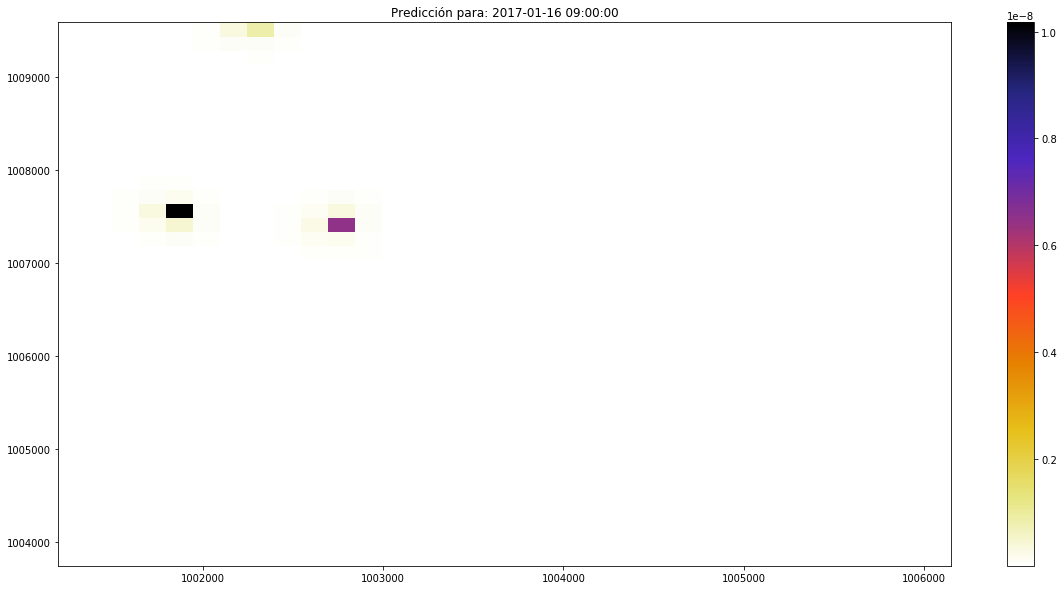

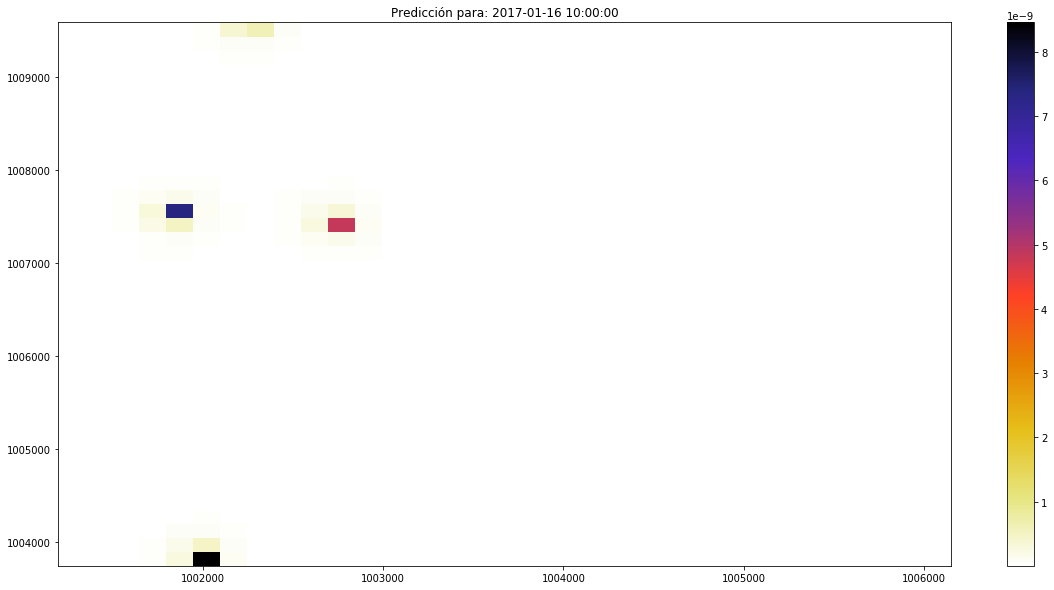

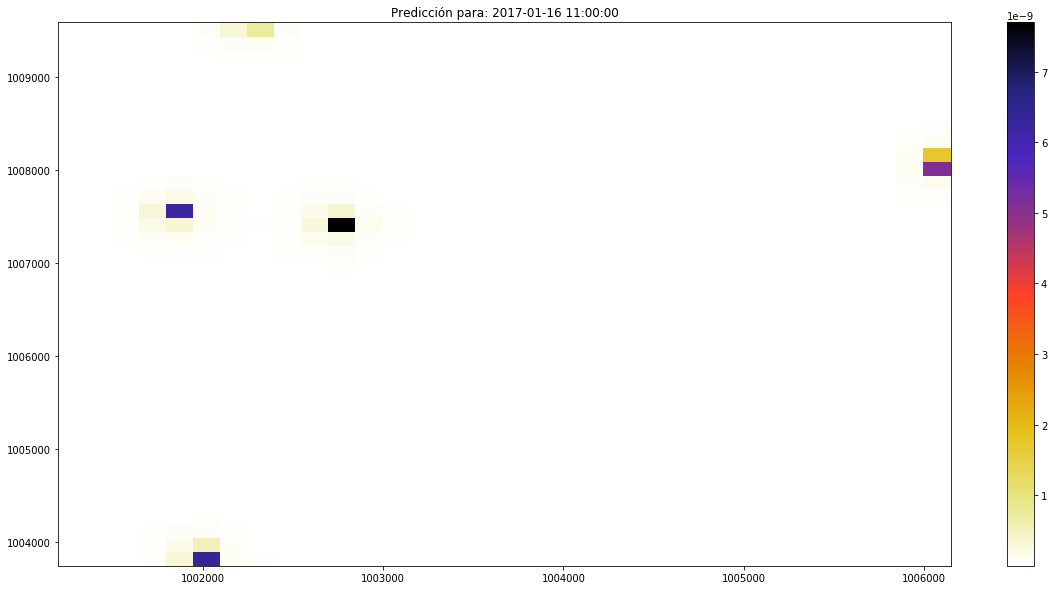

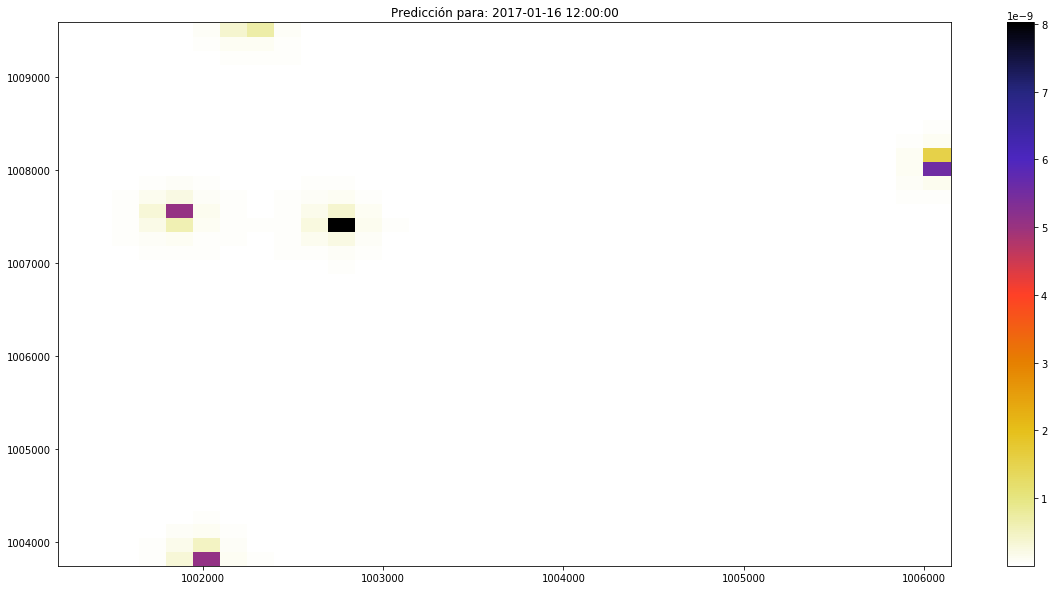

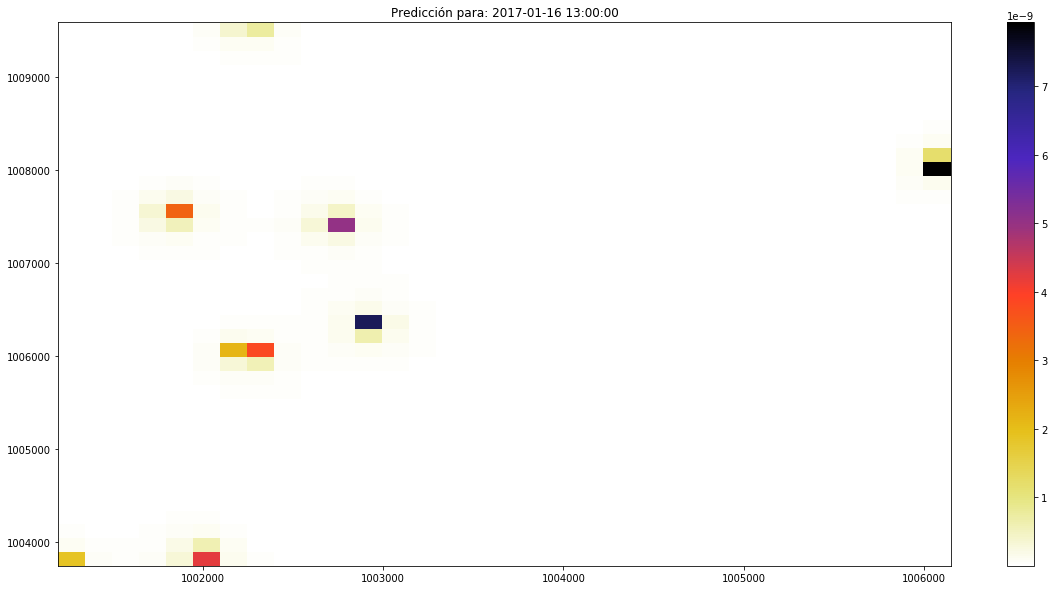

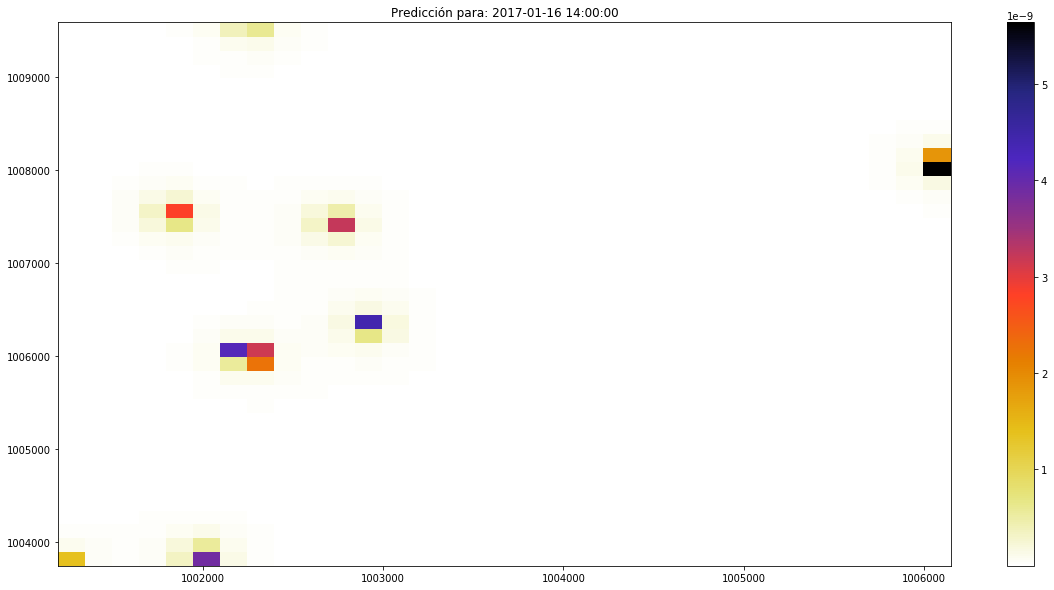

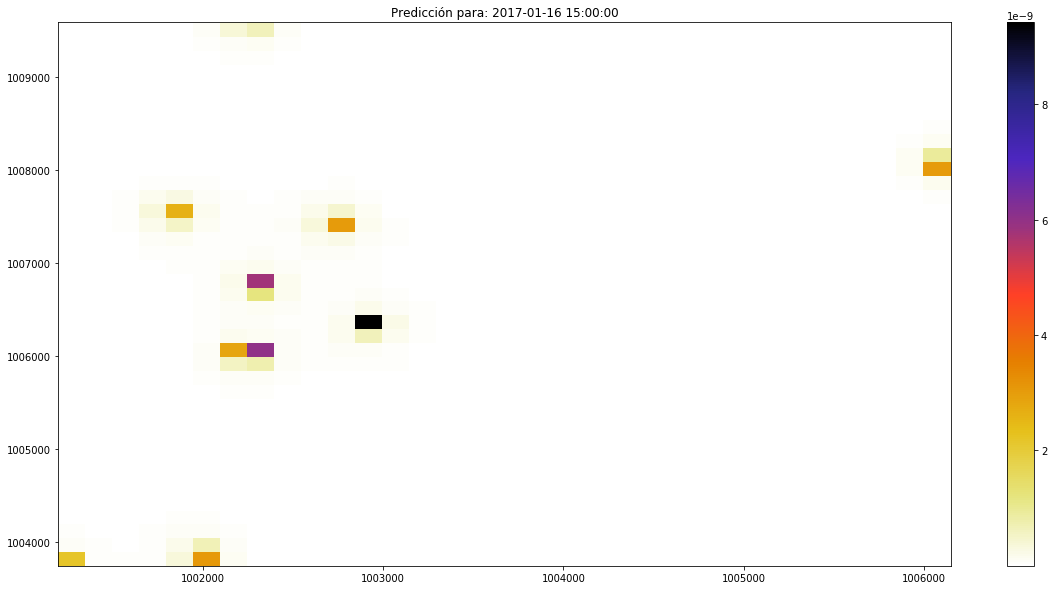

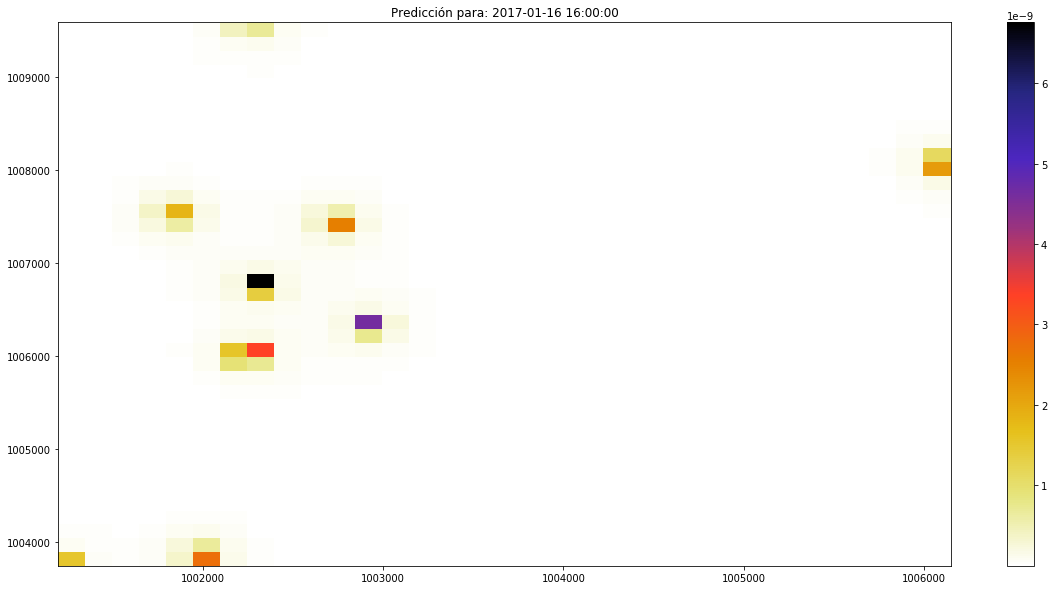

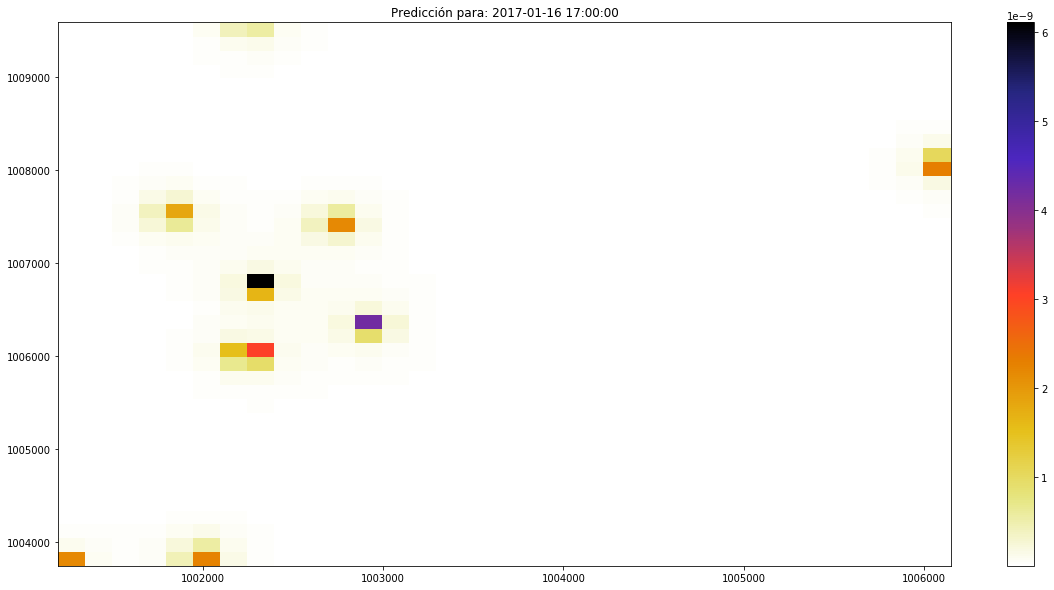

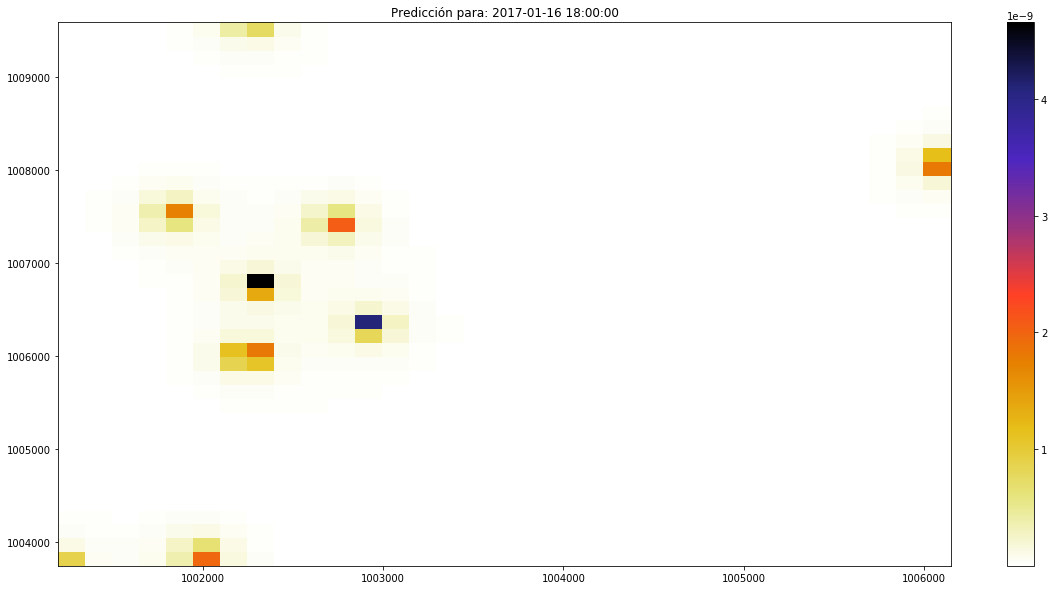

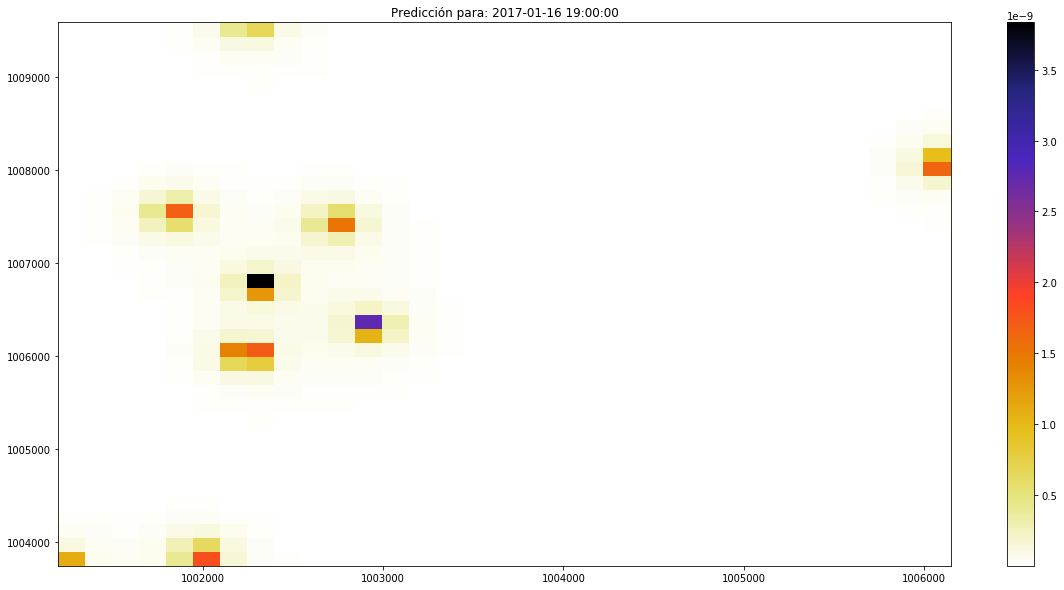

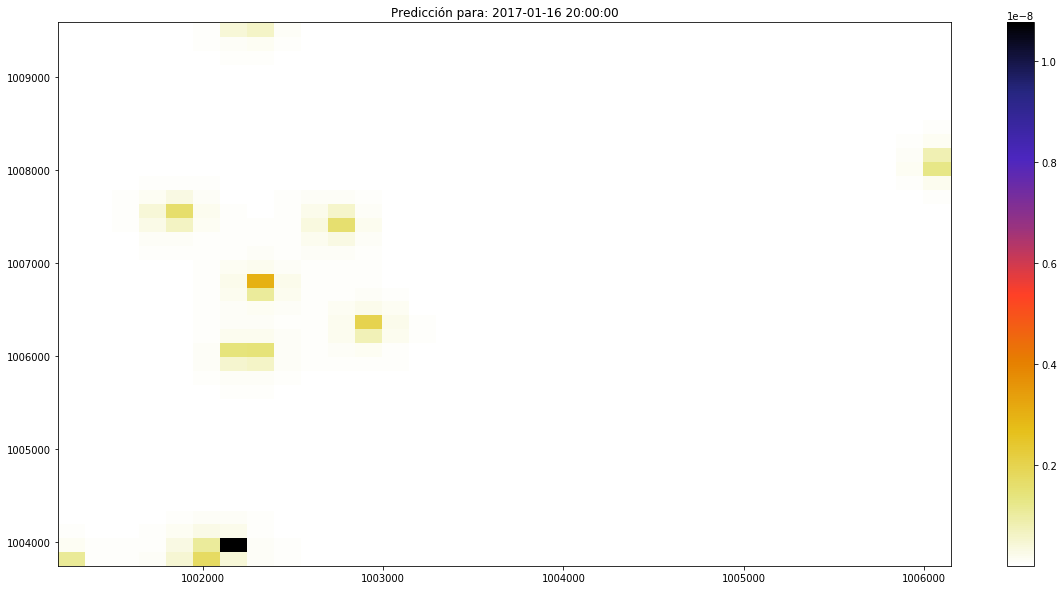

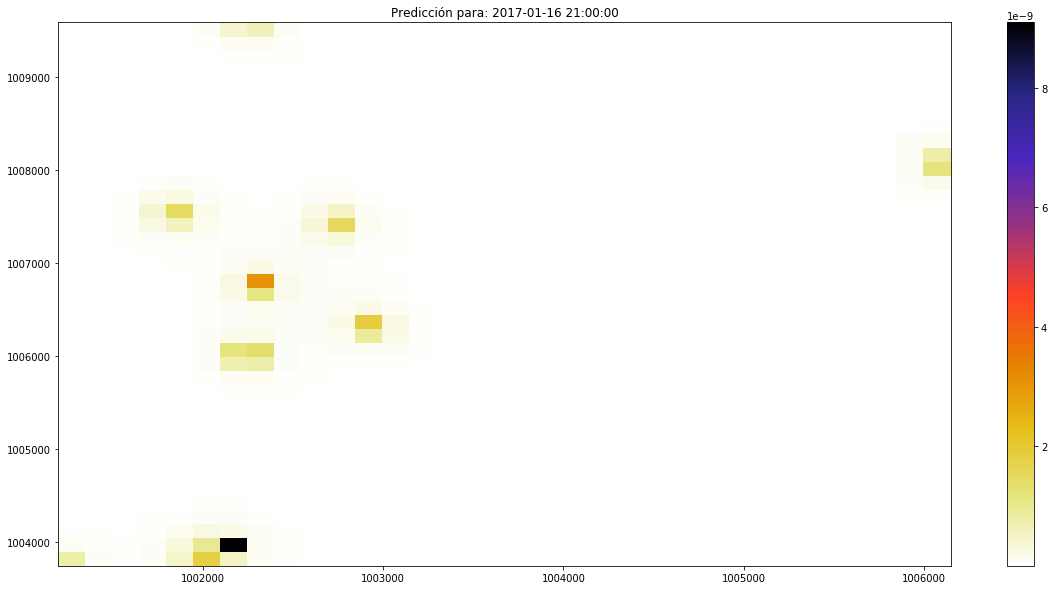

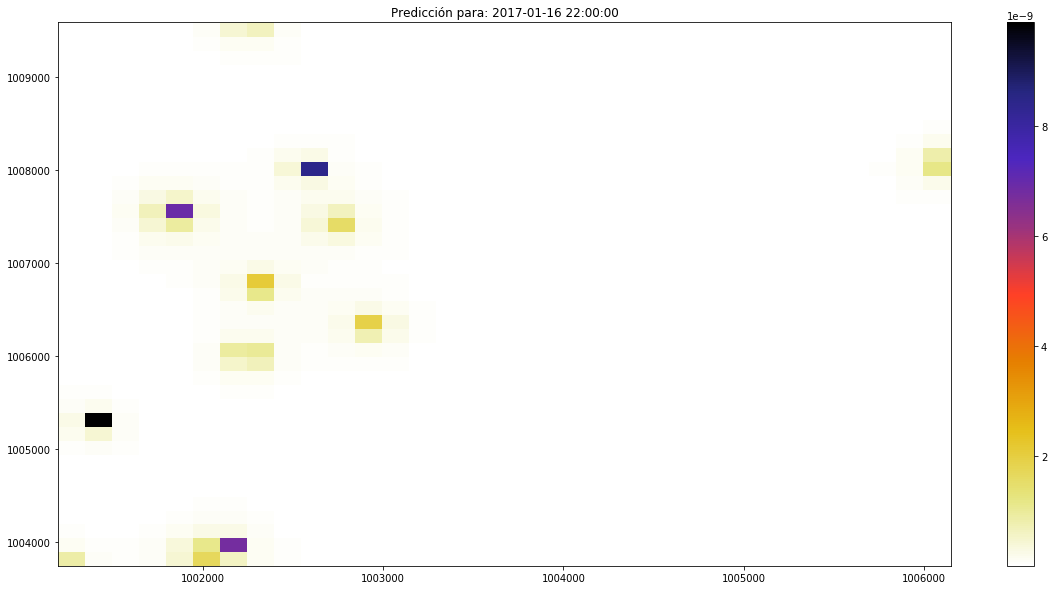

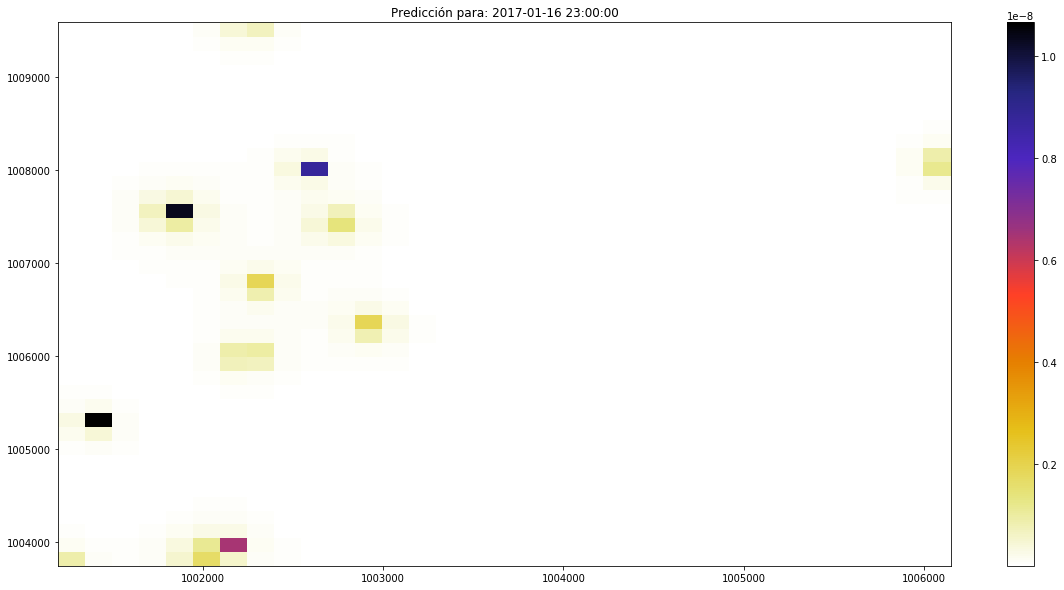

In [29]:
from PIL import Image

for iHour in range(24):
    predict_time = datetime.datetime(2017,1,16)+datetime.timedelta(hours=iHour)
    modelCrime.data = points_crime 
    prediction = modelCrime.predict(predict_time)
    gridpred = open_cp.predictors.GridPredictionArray.from_continuous_prediction_region(prediction, region, 150, 150)
    hitrates = open_cp.evaluation.hit_rates(gridpred, points_crime, [0.01,0.1])
    fig, ax = plt.subplots(figsize=(20,10))
    m = ax.pcolormesh(*gridpred.mesh_data(), gridpred.intensity_matrix, cmap="CMRmap_r")
    ax.set_title("Predicción para: "+str(predict_time) + "hirate" + )
    fig.colorbar(m, ax=ax)
    print(predict_time)
    print(print(hitrates))

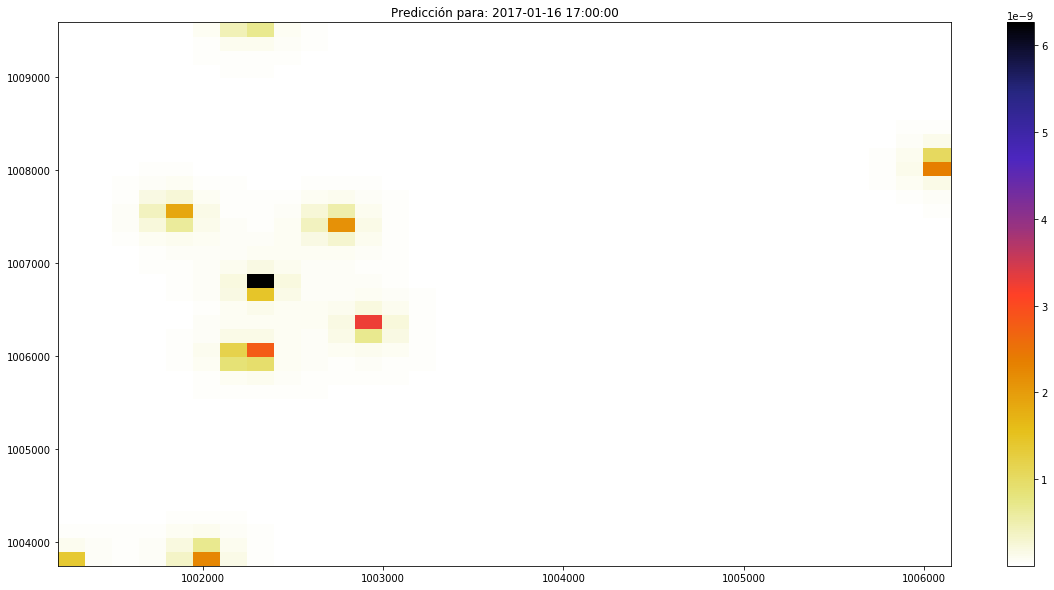

In [21]:
#Graficando
from PIL import Image

fig, ax = plt.subplots(figsize=(20,10))
m = ax.pcolormesh(*gridpred.mesh_data(), gridpred.intensity_matrix, cmap="CMRmap_r")
ax.set_title("Predicción para: "+str(predict_time))
fig.colorbar(m, ax=ax)

